In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


# Continue with your analysis...

### Reading the Data :

In [34]:
# Directly specify the path to the CSV file
file_path = r'C:\Users\PC\Documents\UPWORK\AYUSH\WineQT.csv'
df = pd.read_csv(file_path)
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075  

In [10]:
del df['Id']

In [12]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [13]:
df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


### **Exploratory analysis**

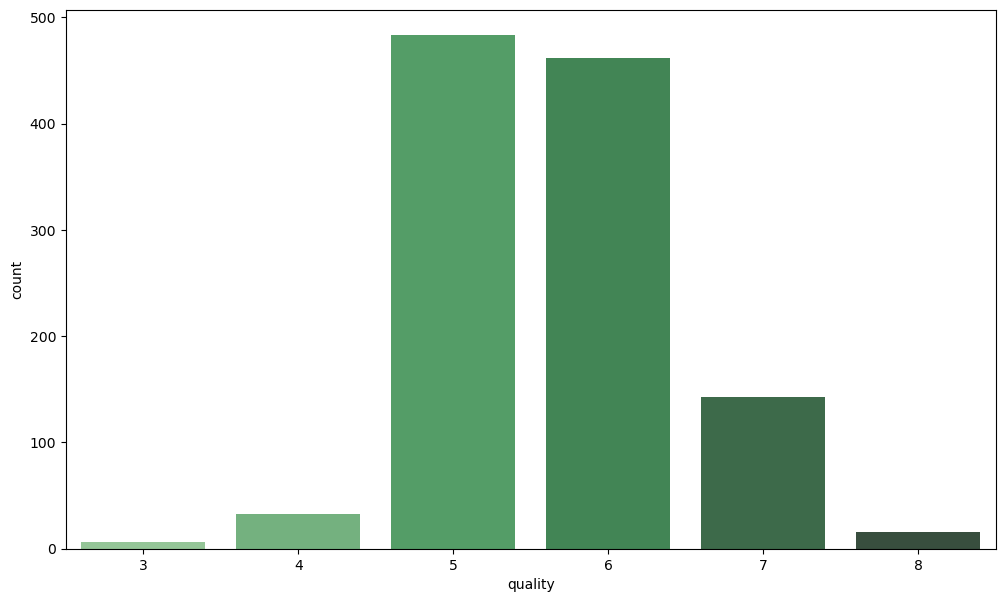

In [14]:
plt.figure(figsize=(12,7))
sns.countplot(x='quality',data=df,palette='Greens_d')
plt.show()

### Correlation of dataset is given below 

In [15]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


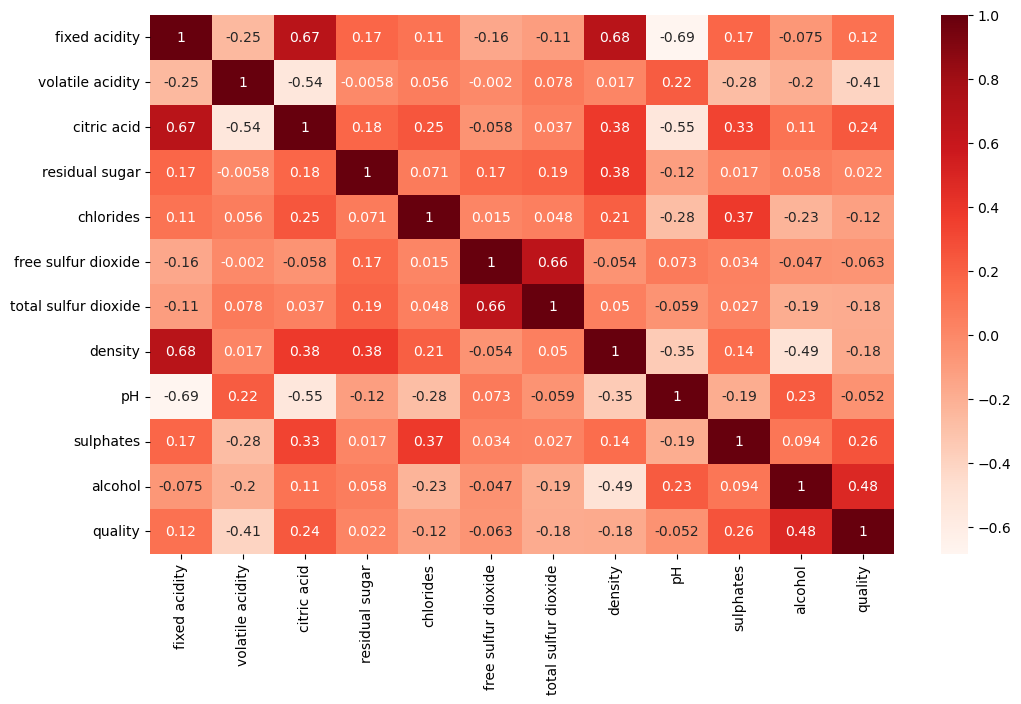

In [16]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

### Plot b/w total sulphur dioxide and free sulphur dioxide 

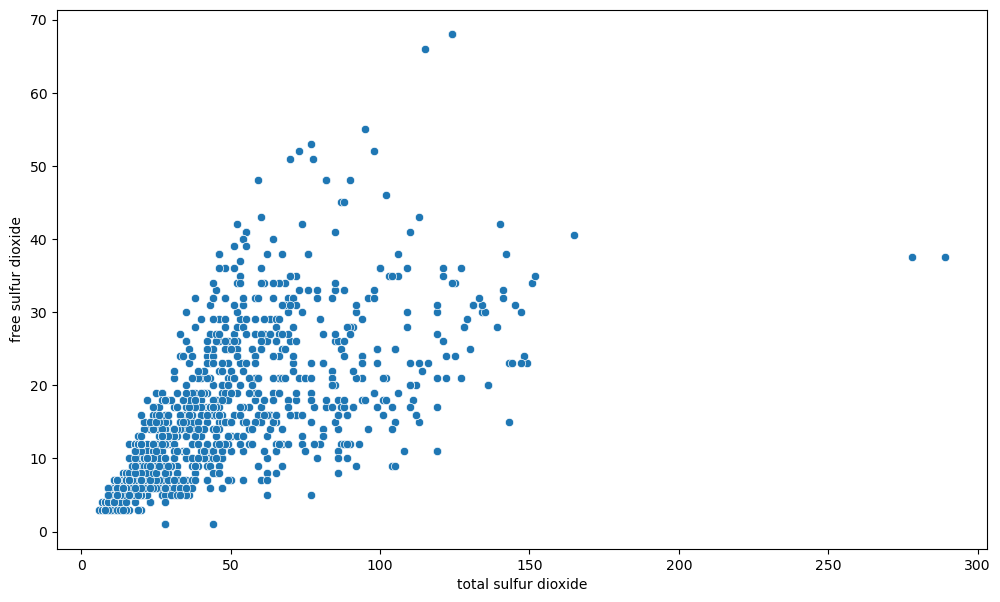

In [17]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='total sulfur dioxide',y='free sulfur dioxide',data=df)
plt.show()

### Quality of wine varies b/w 3-8,and the below plot give information about how the quality changes with respect to  volatile acidity

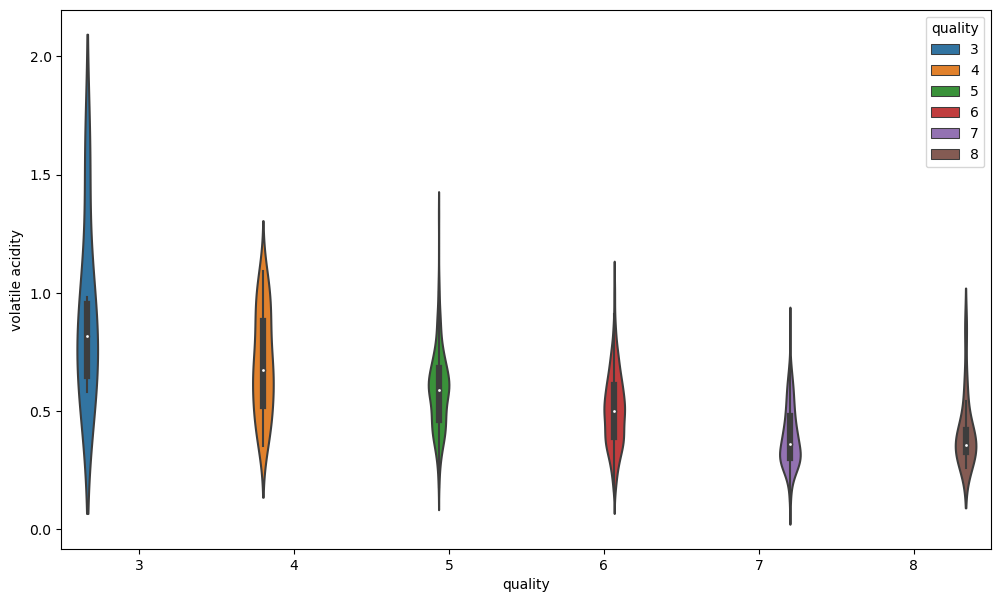

In [18]:
plt.figure(figsize=(12,7))
sns.violinplot(x='quality',y='volatile acidity',data=df,hue='quality')
plt.show()

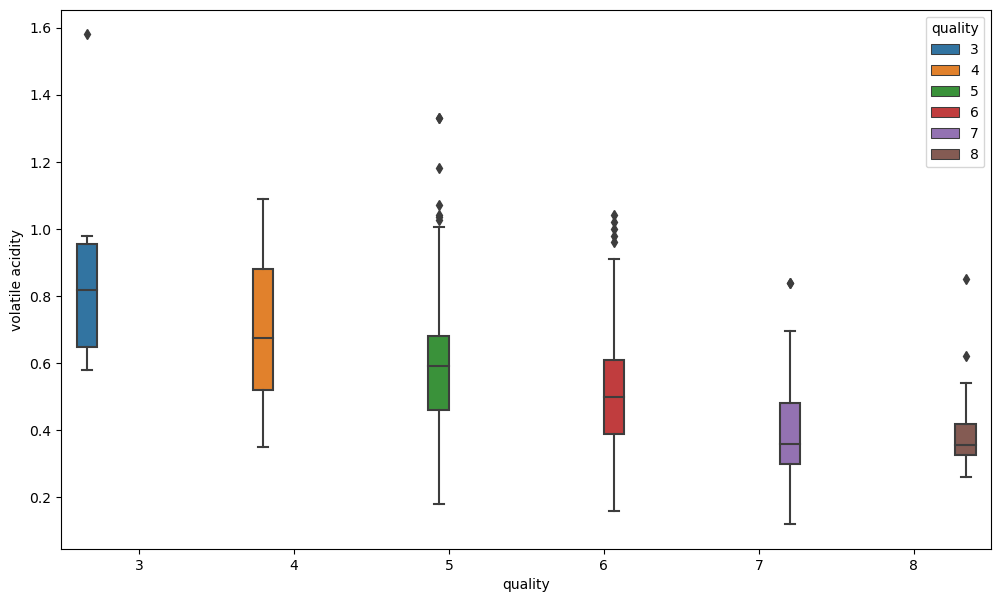

In [19]:
plt.figure(figsize=(12,7))
sns.boxplot(x='quality',y='volatile acidity',data=df,hue='quality')
plt.show()

### The below plot explians in detail about how the density of wine varies with the fixed acidity

<Axes: xlabel='density', ylabel='fixed acidity'>

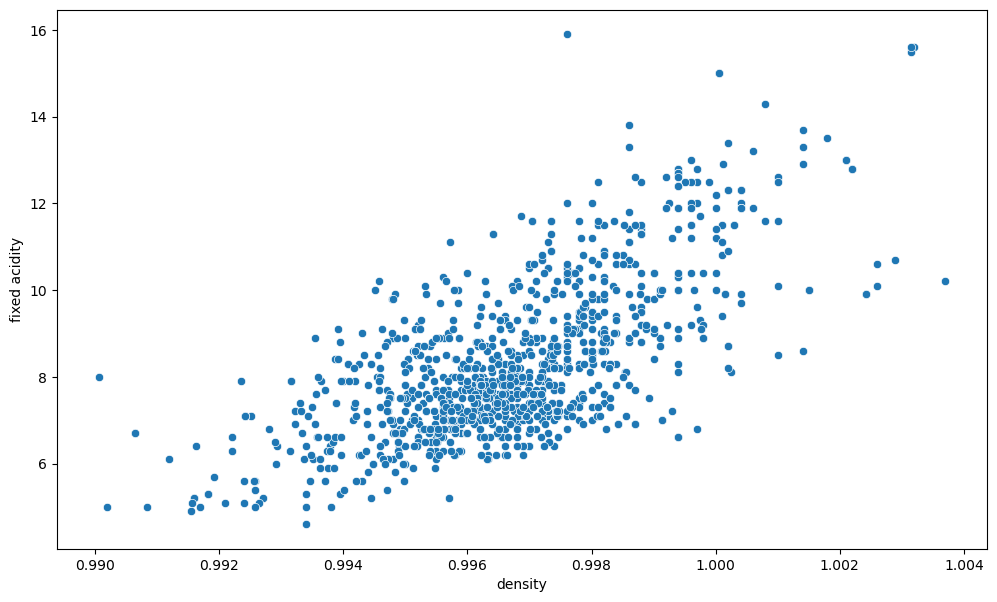

In [20]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='density',y='fixed acidity',data=df)

### The below plot explains about how volatile acidity of wine changes with respect to citric acid  

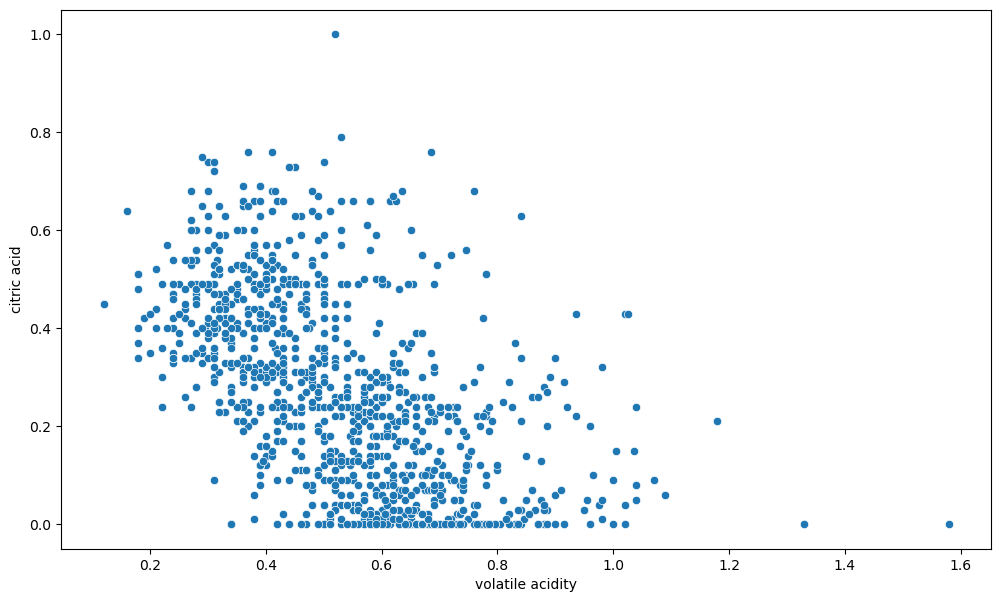

In [21]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='volatile acidity',y='citric acid',data=df)
plt.show()

### The below plot explains how quality of wine varies in according with sulphates in it 

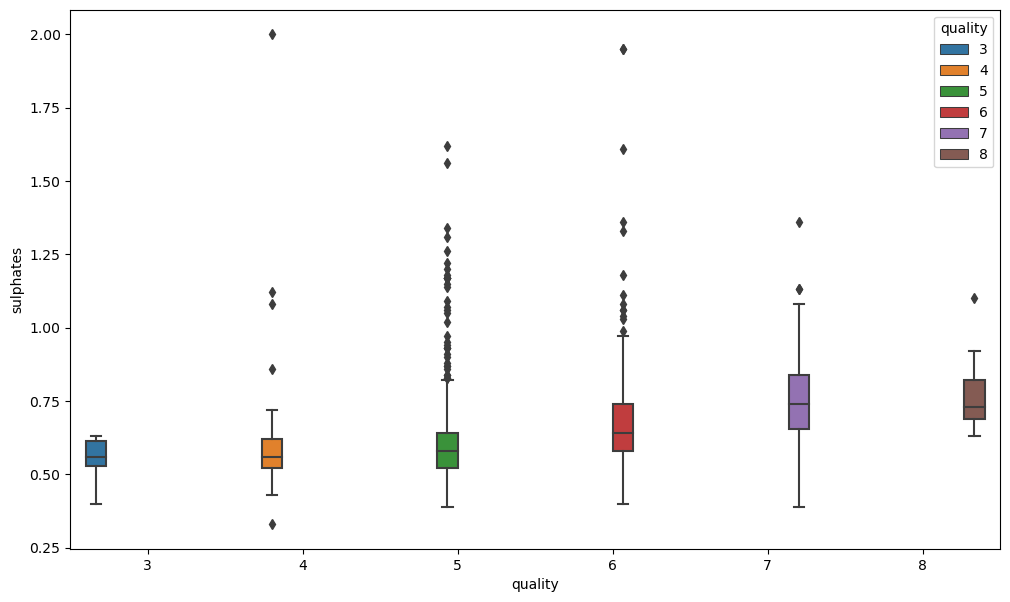

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot(x='quality',y='sulphates',data=df,hue='quality')
plt.show()

### The below plot describes about citric acid and volatile acidity

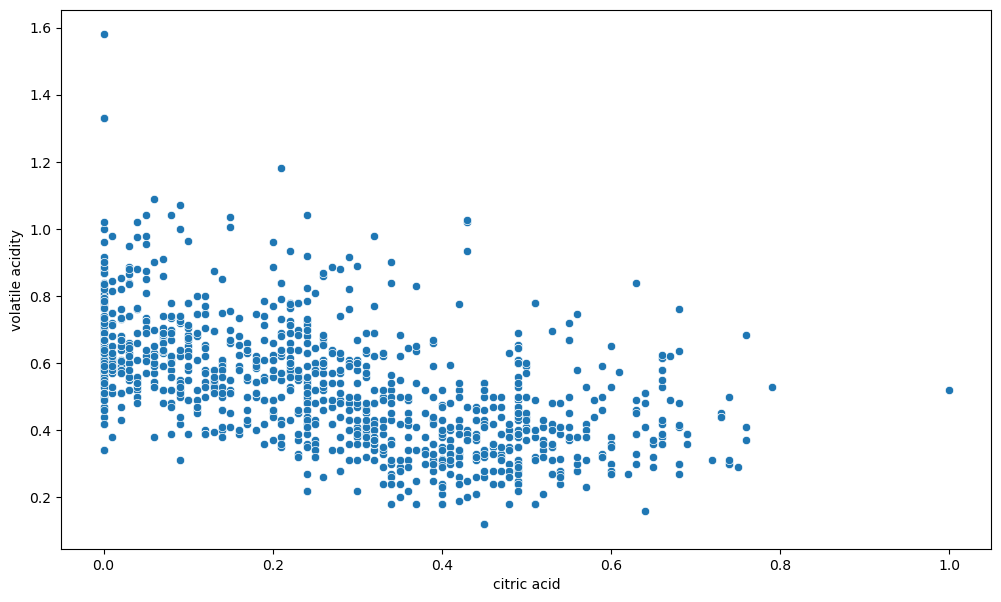

In [23]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='citric acid',y='volatile acidity',data=df)
plt.show()

### Data Preprocessing

In [24]:
for col in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']:
    df[col]=df[col]/df[col].max()

### Splitting the dataset as 20% for testing and 80% for training

In [25]:
feature=np.array(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
label=np.array(df['quality'])

xtrain,xtest,ytrain,ytest=train_test_split(feature,label,test_size=0.2,random_state=0)

### Preparing for Models 

In [26]:
model_comp={}

### 1.Logistic Regression

In [27]:
lgr=LogisticRegression()
lgr.fit(xtrain,ytrain)
y1=lgr.predict(xtest)
print(accuracy_score(ytest,y1))
print(f1_score(ytest,y1,average='weighted'))
print(classification_report(ytest,y1))

model_comp['logistic regression']=[accuracy_score(y1,ytest),f1_score(ytest,y1,average='weighted')]

0.6375545851528385
0.5818306114188381
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.69      0.82      0.75       100
           6       0.58      0.70      0.63        92
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.21      0.25      0.23       229
weighted avg       0.54      0.64      0.58       229



### 2. Decision Tree 

In [28]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
y2=dt.predict(xtest)

print(accuracy_score(ytest,y2))
print(f1_score(ytest,y2,average='weighted'))
print(classification_report(ytest,y2))

model_comp['decision tree']=[accuracy_score(y2,ytest),f1_score(ytest,y2,average='weighted')]

0.5895196506550219
0.5924025998261806
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.09      0.14      0.11         7
           5       0.67      0.67      0.67       100
           6       0.59      0.58      0.58        92
           7       0.52      0.48      0.50        27
           8       0.33      0.50      0.40         2

    accuracy                           0.59       229
   macro avg       0.37      0.40      0.38       229
weighted avg       0.60      0.59      0.59       229



###  3 RandomForest

In [29]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
y3=rf.predict(xtest)

print(accuracy_score(ytest,y3))
print(f1_score(ytest,y3,average='weighted'))
print(classification_report(ytest,y3))


model_comp['Random forest']=[accuracy_score(y3,ytest),f1_score(ytest,y3,average='weighted')]

0.6681222707423581
0.6521506345396003
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.72      0.76      0.74       100
           6       0.61      0.68      0.65        92
           7       0.67      0.52      0.58        27
           8       0.00      0.00      0.00         2

    accuracy                           0.67       229
   macro avg       0.33      0.33      0.33       229
weighted avg       0.64      0.67      0.65       229



### 4 KNN

In [30]:
k=KNeighborsClassifier()
k.fit(xtrain,ytrain)
y4=k.predict(xtest)

print(accuracy_score(ytest,y4))
print(f1_score(ytest,y4,average='weighted'))
print(classification_report(ytest,y4))

model_comp['KNN']=[accuracy_score(y4,ytest),f1_score(ytest,y4,average='weighted')]

0.5589519650655022
0.5395476430410928
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.64      0.69      0.66       100
           6       0.51      0.58      0.54        92
           7       0.33      0.22      0.27        27
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.25      0.25      0.25       229
weighted avg       0.53      0.56      0.54       229



### 5 SVC 

In [31]:
s=SVC()
s.fit(xtrain,ytrain)
y5=s.predict(xtest)

print(accuracy_score(ytest,y5))
print(f1_score(ytest,y5,average='weighted'))
print(classification_report(ytest,y5))

model_comp['svc']=[accuracy_score(y5,ytest),f1_score(ytest,y5,average='weighted')]

0.6637554585152838
0.6069291484469779
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.81      0.77       100
           6       0.60      0.77      0.68        92
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.22      0.26      0.24       229
weighted avg       0.56      0.66      0.61       229



### Model Comparison 
### accuracy and f1 scores of all applied models are given below 

In [32]:
df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['Accuracy','F1_score']
df1=df1.sort_values('F1_score',ascending=True)
df1.style.background_gradient(cmap='Greens')

,Accuracy,F1_score
KNN,0.558952,0.539548
logistic regression,0.637555,0.581831
decision tree,0.589520,0.592403
svc,0.663755,0.606929
Random forest,0.668122,0.652151
